In [19]:
!pip install pandas scikit-learn numpy seaborn matplotlib numpy tensorflow==1.15

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
^C


In [74]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from google.cloud import storage
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

import tensorflow as tf
import tensorflow.contrib.learn as learn
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_MODEL = './models'
TRAINING_MODEL_NAME = 'iris-trained'
MODEL_NAME = 'iris'

SIGNATURE_NAME = 'predict'
OUTPUT_KEYS = ["class_ids", "classes", "logistic", "logits", "probabilities"]

PATH = os.path.join(os.getcwd())

In [75]:
raw_data = datasets.load_iris()

features_names = list()

for feature in raw_data['feature_names']:
    features_names.append(feature)
features_names.append('FEATURE')

data = pd.DataFrame(data=np.c_[raw_data['data'], raw_data['target']], columns=features_names)

In [76]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),FEATURE
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


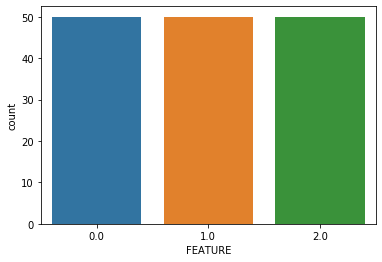

In [77]:
sns.countplot(data=data, x='FEATURE')

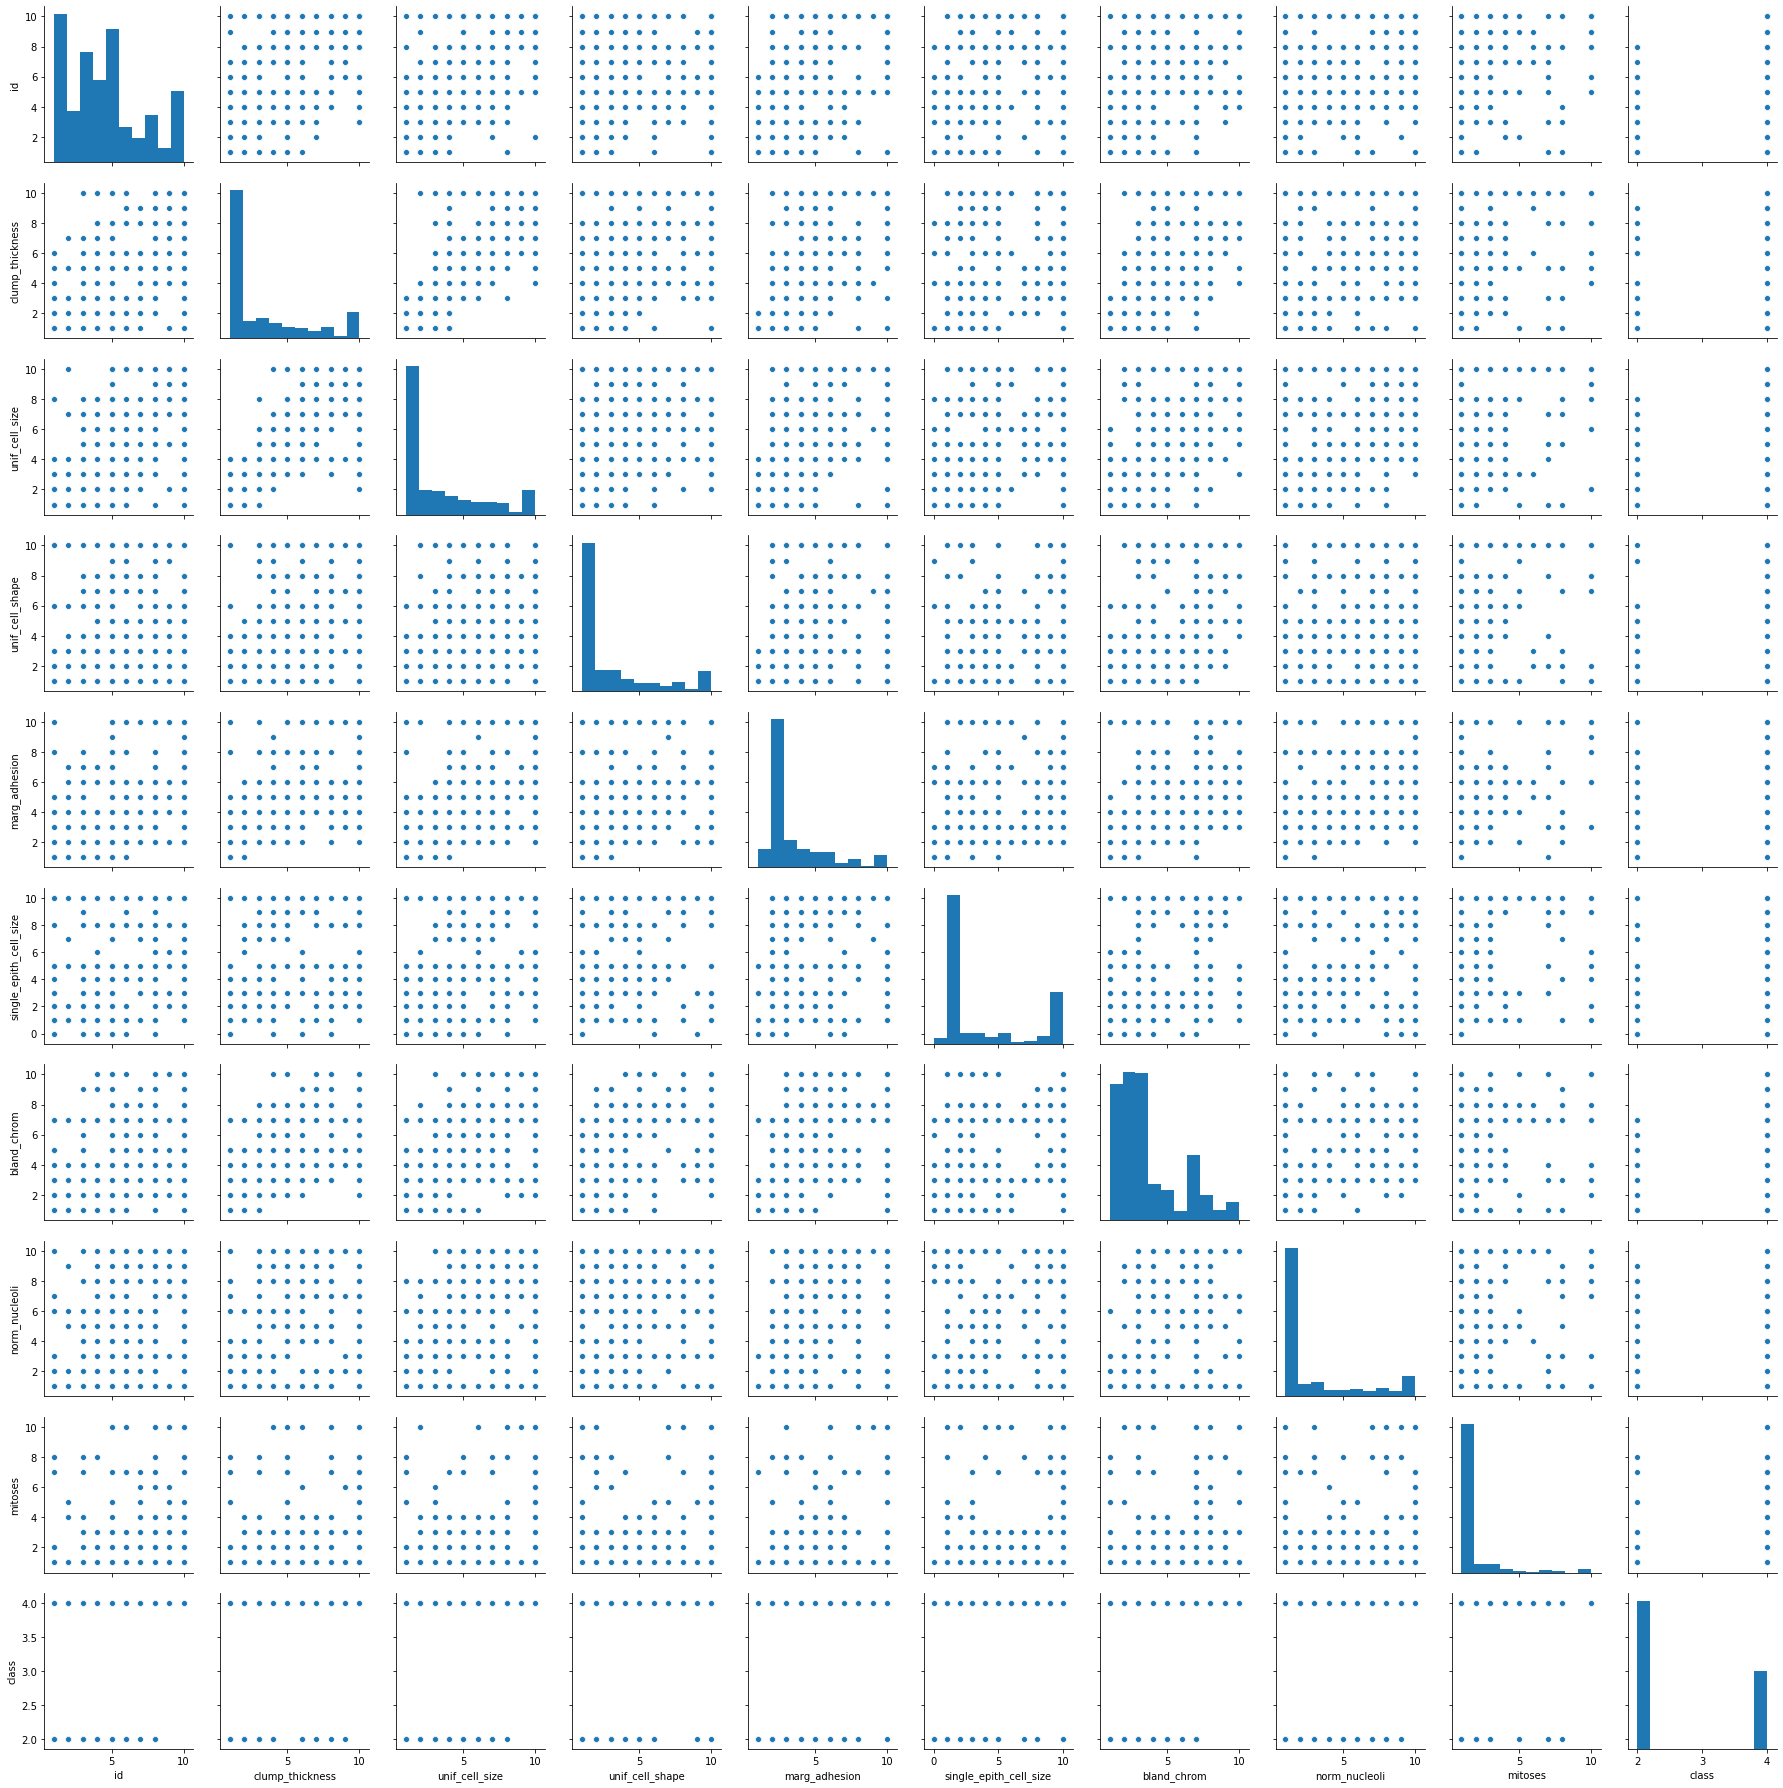

In [39]:
sns.pairplot(data=full_data)

In [78]:
X = raw_data.data
y = raw_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [79]:
dimensions = raw_data.data.shape[1]
clases = 3
epochs = 2000

feature_columns = [tf.contrib.layers.real_valued_column("", dimension = dimensions)] 
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)

classifier = tf.contrib.learn.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[12, 48, 12],
    optimizer=optimizer,
    n_classes=clases,
    dropout=0.1,
    model_dir=PATH + '/tmp/' + TRAINING_MODEL_NAME)

classifier.fit(
    x = X_train,
    y = y_train,
    steps= epochs)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fb317251510>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/home/jovyan/work/tmp/iris-trained'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/jovyan/work/tmp/iris-trained/model.ckpt-2000
Instructions for updating:
Use standa

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7fb3172ea4d0>, 'hidden_units': [12, 48, 12], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fb3172ea690>, 'activation_fn': <function relu at 0x7fb326bf8680>, 'dropout': 0.1, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

INFO:tensorflow:Starting evaluation at 2020-02-11T15:37:01Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/jovyan/work/tmp/iris-trained/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-02-11-15:37:01
INFO:tensorflow:Saving dict for global step 4000: accuracy = 1.0, global_step = 4000, loss = 0.022336457
Accuracy: 1.000000
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /home/jovyan/work/tmp/iris-trained/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Raw Predictions:    [0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 0, 0]

[[ 9  0  0]
 [ 0  8  0]
 [ 0  0 13]]


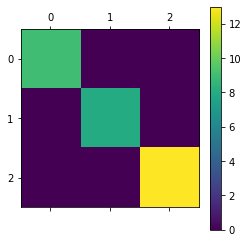

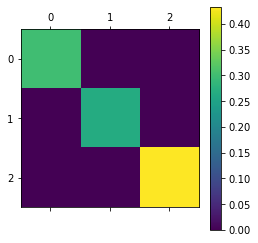

              precision    recall  f1-score   support

      setosa       0.22      0.33      0.27         6
  versicolor       0.50      0.36      0.42        11
   virginica       0.54      0.54      0.54        13

    accuracy                           0.43        30
   macro avg       0.42      0.41      0.41        30
weighted avg       0.46      0.43      0.44        30



In [94]:
accuracy_score = classifier.evaluate(x = X_test, y = y_test)["accuracy"]

print('Accuracy: {0:f}'.format(accuracy_score))

real_predictions = list(y_test)
predictions = list(classifier.predict(X_test))
print("Raw Predictions:    {}\n".format(predictions))

with tf.Session() as sess:
    confusion_matrix = tf.confusion_matrix(labels = real_predictions, 
                                           predictions = predictions, 
                                           num_classes=3,
                                           name='Fictizia')
    confusion_matrix_to_Print = sess.run(confusion_matrix)
    print(confusion_matrix_to_Print)
    
    
cm = metrics.confusion_matrix(real_predictions, predictions, [0, 1, 2])

plt.matshow(cm)
plt.colorbar()
plt.show()

cm = metrics.confusion_matrix(real_predictions, predictions, [0, 1, 2], normalize='all')
plt.matshow(cm)
plt.colorbar()
plt.show()

report = metrics.classification_report(labels, 
                                       predictions, 
                                       target_names = raw_data.target_names)

print(report)